### Implementing Univariate Linear Regression from scratch using Gradient Descent

#### Here I am using an already available dataset that has 2 columns.

In [52]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error


In [3]:
# reading data in a pandas dataframe
df=pd.read_csv('data.csv')

In [5]:
df.columns=['no_of_hours_studied','marks_obtained']

In [6]:
df.head()

,no_of_hours_studied,marks_obtained
0,55.766804,71.207596
1,63.870358,64.992382
2,49.815640,73.976632
3,62.153208,89.660925
4,57.482188,80.641518


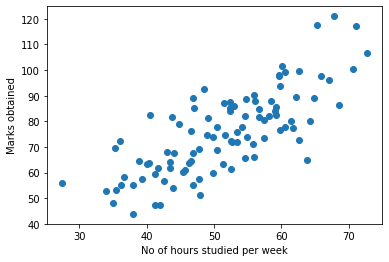

In [7]:
plt.scatter(df.no_of_hours_studied,df.marks_obtained)
plt.xlabel('No of hours studied per week')
plt.ylabel('Marks obtained')
plt.show()

In [25]:
# implementing loss function
def loss_fn(m,b,data_points):
    error=0
    for i in range(len(data_points)):
        x=data_points.iloc[i,0]
        y=data_points.iloc[i,1]
        error+=(y-(m*x+b))**2
    return error/float(len(data_points))

In [26]:
# implementing gradient descent funtion
def gradient_descent(m1,b1,data_points,lr=0.0001):
    m_gd=0
    b_gd=0
    n=float(len(data_points))
    for i in range(len(data_points)):
        x=data_points.iloc[i,0]
        y=data_points.iloc[i,1]
        m_gd += -(2/n)*x*(y-(m1*x+b1))
        b_gd += -(2/n)*(y-(m1*x+b1))
    m=m1-lr*m_gd
    b=b1-lr*b_gd
    return [m,b]

In [27]:
# Training the model on the dataset
m=0
b=0
lr=0.0001
epochs=1000
for i in range(epochs):
    m,b=gradient_descent(m,b,df,lr)
print(m,b)

1.4607911678007937 0.08980028357345665


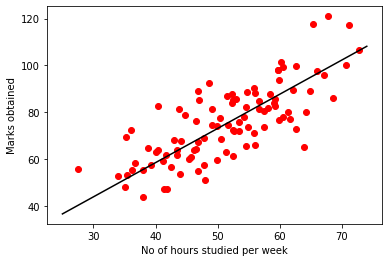

In [28]:
# plotting the regression or best fit line
plt.scatter(df.no_of_hours_studied,df.marks_obtained,color="red")
plt.xlabel('No of hours studied per week')
plt.ylabel('Marks obtained')
plt.plot(list(range(25,75)), [m*x+b for x in range(25,75)],color="black")
plt.show()

In [63]:
x=df.no_of_hours_studied
y=df.marks_obtained
x_train=x[:80]
y_train=y[:80]
x_test=x[80:]
y_test=y[80:]

#### 2nd Method - Using coefficients i.e. calculating m and b amf then fitting the model

In [47]:
# imports
import numpy as np

In [48]:
# Calculating mean
def mean(arr):
    return np.sum(arr)/len(arr)

In [49]:
# Calculating variance
def variance(arr, mean):
    return np.sum((arr-mean)**2)

In [50]:
# Calculating covariance
def covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

In [51]:
# Coefficients 
# m = cov(x, y) / var(x)
# b = y - m*x
def get_coefficients(x, y):
    x_mean = mean(x)
    y_mean = mean(y)
    m = covariance(x, x_mean, y, y_mean)/variance(x, x_mean)
    b = y_mean - x_mean*m
    return m, b

In [54]:
x=df.no_of_hours_studied
y=df.marks_obtained

In [55]:
def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, b = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + b
        prediction.append(y)
    
    r2 = r2_score(prediction, y_test)
    mse = mean_squared_error(prediction, y_test)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mse)
    return prediction
prediction = linear_regression(x[:80], y[:80], x[80:], y[80:])

The R2 score of the model is:  0.5113103013900129
The MSE score of the model is:  101.57961402049528


In [56]:
def plot_reg_line(x, y):
    # Calculate predictions for x ranging from 1 to 100
    prediction = []
    m, c = get_coefficients(x, y)
    for x0 in range(1,100):
        yhat = m*x0 + c
        prediction.append(yhat)

C:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


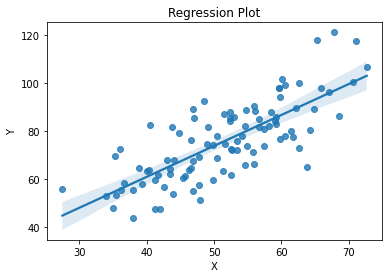

In [61]:
# Regression plot
sns.regplot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Regression Plot")
plt.show()